In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

In [52]:
def fx_nonlinear(x, y):
    return x * (3 - x - 2 * y)

def fy_nonlinear(x, y):
    return y * (2 - x - y)

In [53]:
x_sym, y_sym = symbols('x y')

eq1 = Eq(x_sym * (3 - x_sym - 2 * y_sym), 0)
eq2 = Eq(y_sym * (2 - x_sym - y_sym), 0)

fixed_points = solve((eq1, eq2), (x_sym, y_sym))
print("Fixed Points:", fixed_points)


Fixed Points: [(0, 0), (0, 2), (1, 1), (3, 0)]


In [54]:
def midpoint_method(fx, fy, x0, y0, dt, steps):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0], y[0] = x0, y0
    for n in range(steps - 1):
        kx = dt * fx(x[n], y[n])
        ky = dt * fy(x[n], y[n])
        
        x_mid = x[n] + kx / 2
        y_mid = y[n] + ky / 2
        
        x[n + 1] = x[n] + dt * fx(x_mid, y_mid)
        y[n + 1] = y[n] + dt * fy(x_mid, y_mid)
    return x, y


In [55]:
def plot_nonlinear_phase_portrait(fx, fy, fixed_points, title, xlim=(0,4), ylim=(0,4), num_trajectories=20):
   
    x0_vals = np.linspace(xlim[0], xlim[1], num_trajectories)
    y0_vals = np.linspace(ylim[0], ylim[1], num_trajectories)
    plt.figure(figsize=(8,6))
    
    for x0 in x0_vals:
        for y0 in y0_vals:
            x, y = midpoint_method(fx, fy, x0, y0, dt=0.05, steps=100)
            plt.plot(x, y, color='purple', alpha=0.3)
   
    for fp in fixed_points:
        plt.plot(fp[0], fp[1], 'ro')  
    
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    plt.show()


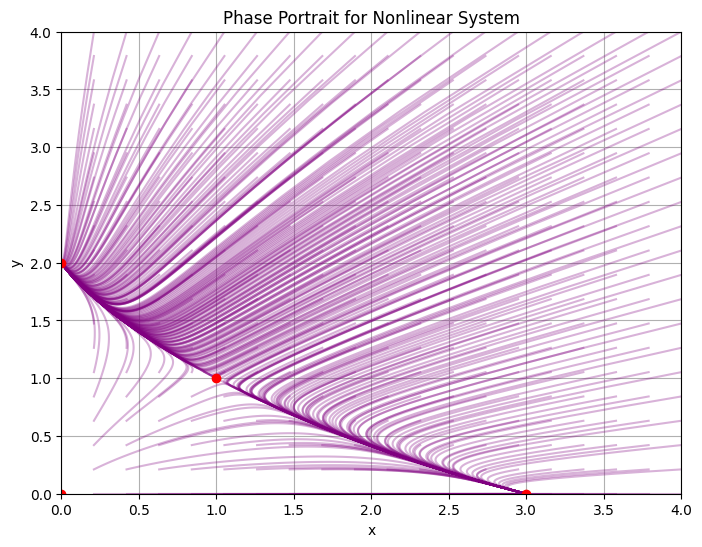

Fixed Points: [(0, 0), (0, 2), (1, 1), (3, 0)]


In [56]:
plot_nonlinear_phase_portrait(fx_nonlinear, fy_nonlinear, fixed_points, title='Phase Portrait for Nonlinear System')
fixed_points = solve((eq1, eq2), (x_sym, y_sym))
print("Fixed Points:", fixed_points)

In [57]:
def fx_lv(x, y):
    alpha = 1.0
    beta = 0.1
    return x * (alpha - beta * y)

def fy_lv(x, y):
    delta = 0.075
    gamma = 1.5
    return y * (delta * x - gamma)


In [58]:
alpha = 1.0  
beta = 0.6     
delta = 0.1 
gamma = 0.4 

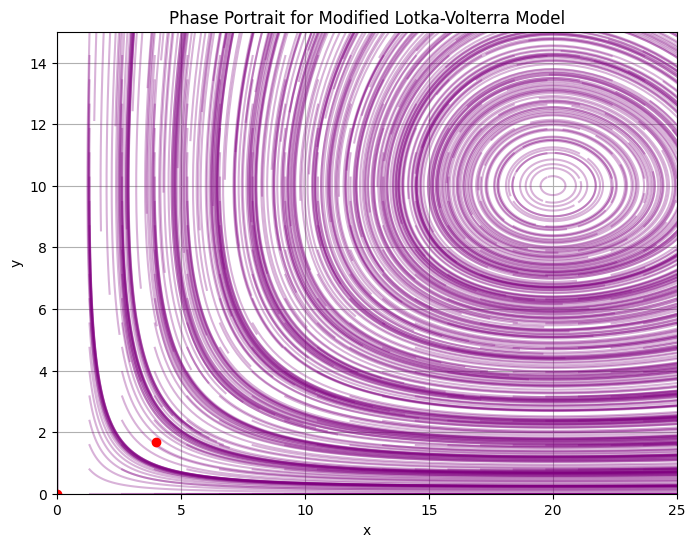

In [59]:
fixed_points_lv = [(0,0), (gamma/delta, alpha/beta)]

plot_nonlinear_phase_portrait(fx_lv, fy_lv, fixed_points_lv, title='Phase Portrait for Modified Lotka-Volterra Model', xlim=(0,25), ylim=(0,15))
